In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
df =  pd.read_csv('P39-Financial-Data.csv')

In [3]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


# Check all missing values

In [4]:
df.info()
# No missing values observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

# Numerical features

In [5]:
num_feature = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature != 'entry_id' and feature != 'e_signed']
print('There are {} numerical feature'.format(len(num_feature)))

There are 18 numerical feature


In [6]:
# Identifying numerical features with binary values (1's and 0's only)
binary_num_feature = [feature for feature in num_feature if df[feature].nunique() <=2]
print('There are {} binary numerical features'.format(len(binary_num_feature)))

There are 2 binary numerical features


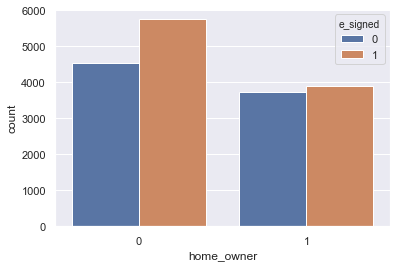

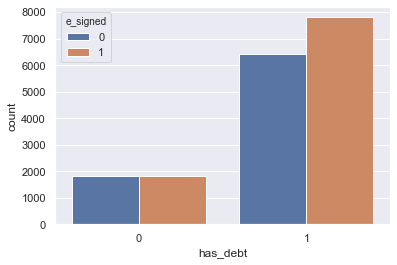

In [7]:
# Visualising all binary features with target feature
for feature in binary_num_feature:
    data = df.copy()
    sns.countplot(x=feature,data=data,hue='e_signed')
    plt.show()

In [8]:
# Checking all unique variables in non-binary numerical data
non_binary_numerical_feature = [feature for feature in num_feature if feature not in  binary_num_feature]

for feature in non_binary_numerical_feature:
    print('{} feature has {} unique labels'.format(feature,df[feature].nunique()))

age feature has 72 unique labels
income feature has 2284 unique labels
months_employed feature has 12 unique labels
years_employed feature has 17 unique labels
current_address_year feature has 13 unique labels
personal_account_m feature has 12 unique labels
personal_account_y feature has 16 unique labels
amount_requested feature has 98 unique labels
risk_score feature has 1411 unique labels
risk_score_2 feature has 17475 unique labels
risk_score_3 feature has 3945 unique labels
risk_score_4 feature has 17628 unique labels
risk_score_5 feature has 17597 unique labels
ext_quality_score feature has 17463 unique labels
ext_quality_score_2 feature has 17469 unique labels
inquiries_last_month feature has 30 unique labels


In [9]:
# We will define discrete variable as numerical variable with less than or equal to 30 labels
disc_num_feature = [feature for feature in non_binary_numerical_feature if df[feature].nunique()<=30]
print('There are {} discrete numerical features'.format(len(disc_num_feature)))

There are 6 discrete numerical features


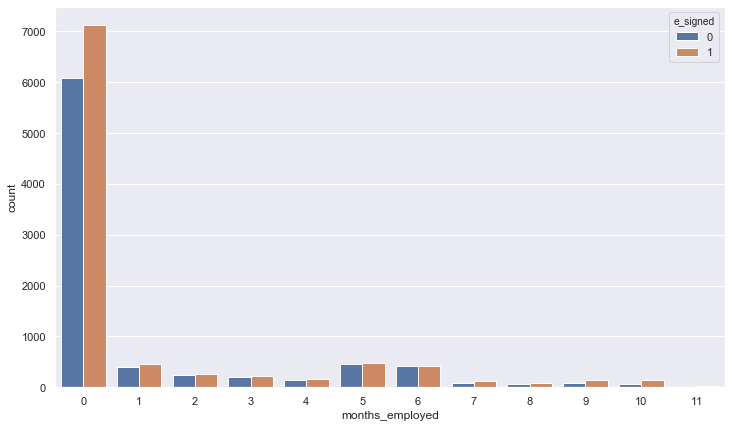

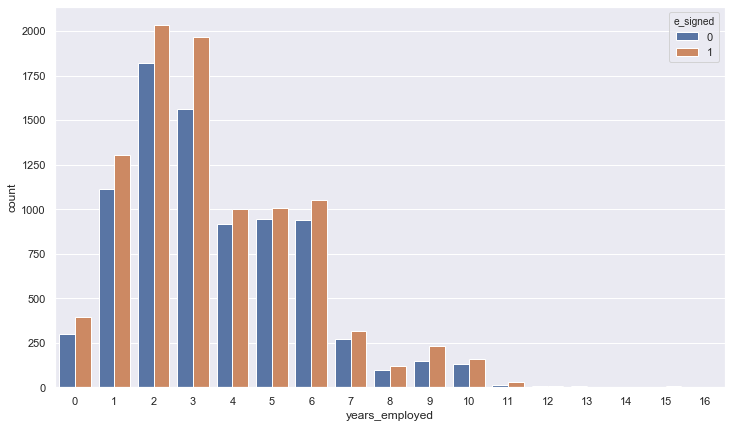

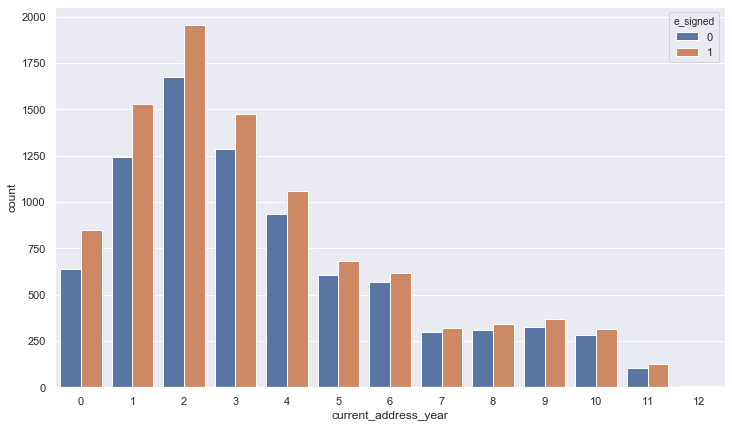

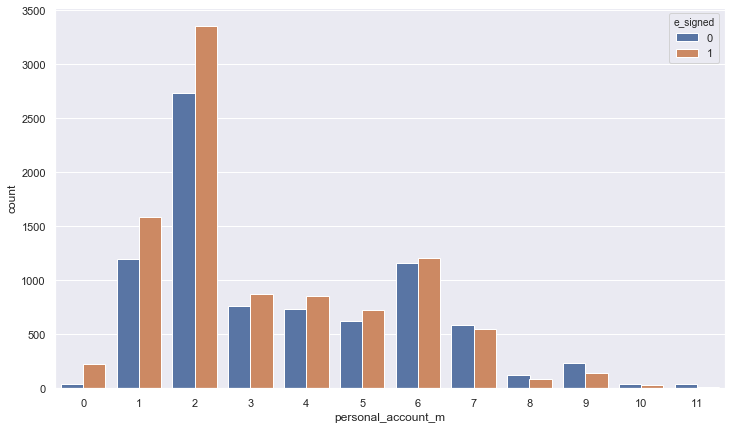

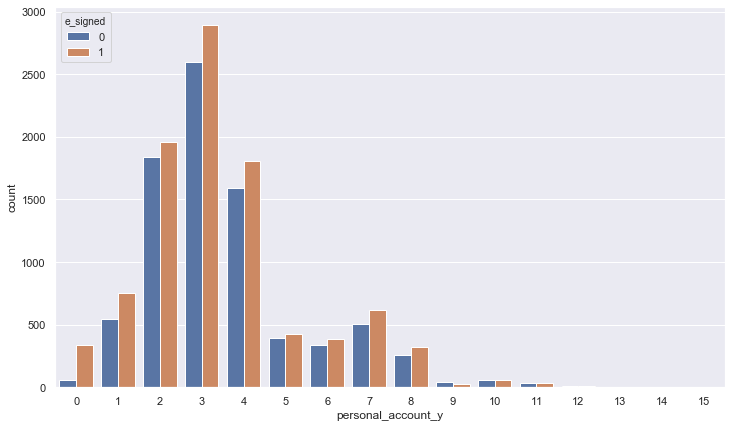

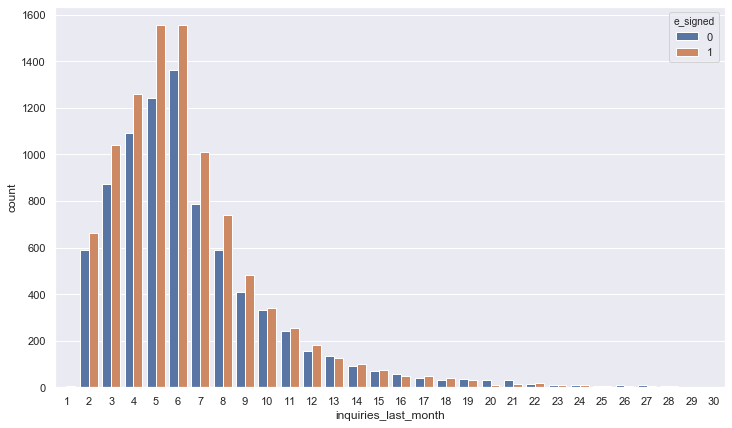

In [10]:
for feature in disc_num_feature:
    plt.figure(figsize=(12,7))
    data =df.copy()
    sns.countplot(x=feature,data=data,hue='e_signed')
    plt.show()

In [11]:
# Identifying continuous variables
conti_num_feature = [feature for feature in non_binary_numerical_feature if feature not in disc_num_feature]
print('There are {} continuous numerical features'.format(len(conti_num_feature)))

There are 10 continuous numerical features


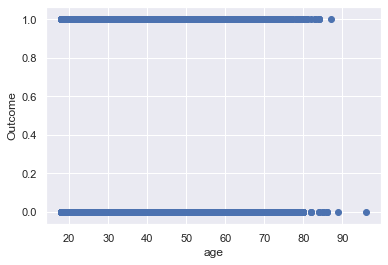

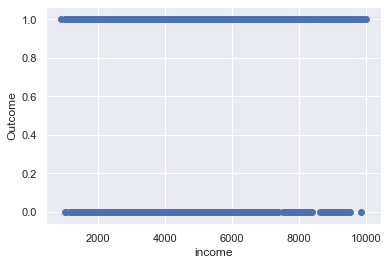

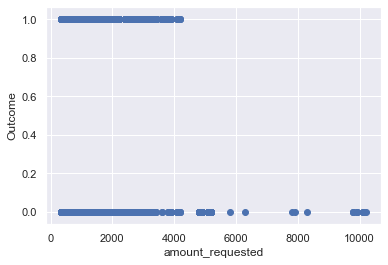

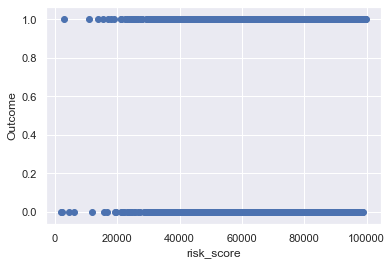

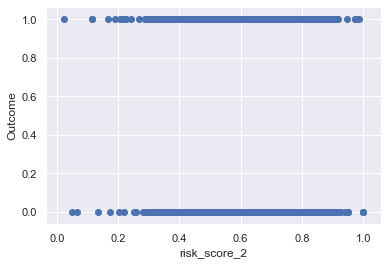

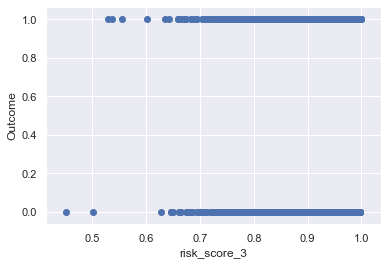

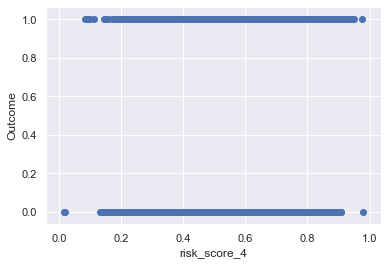

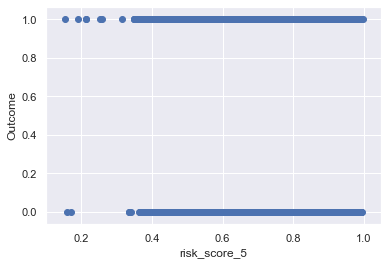

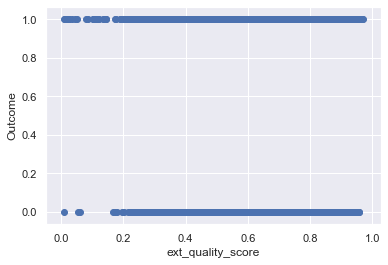

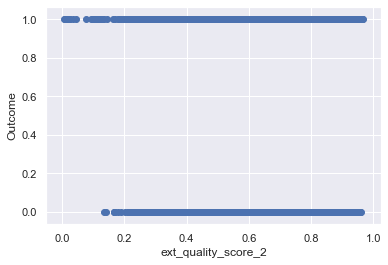

In [12]:
# Visualizing continuous variable
for feature in conti_num_feature:
    data=df.copy()
    plt.scatter(x=data[feature],y=data['e_signed'])
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.show()
    

# Categorical Variables

In [13]:
cat_feature = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('There are {} categorical features'.format(len(cat_feature)))

There are 1 categorical features


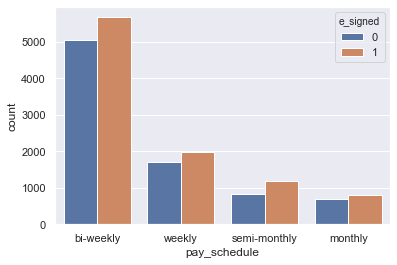

In [14]:
# Visualizing categorical feature
for feature in cat_feature:
    data=df.copy()
    sns.countplot(x=feature,data=data,hue='e_signed')

# Correlation study

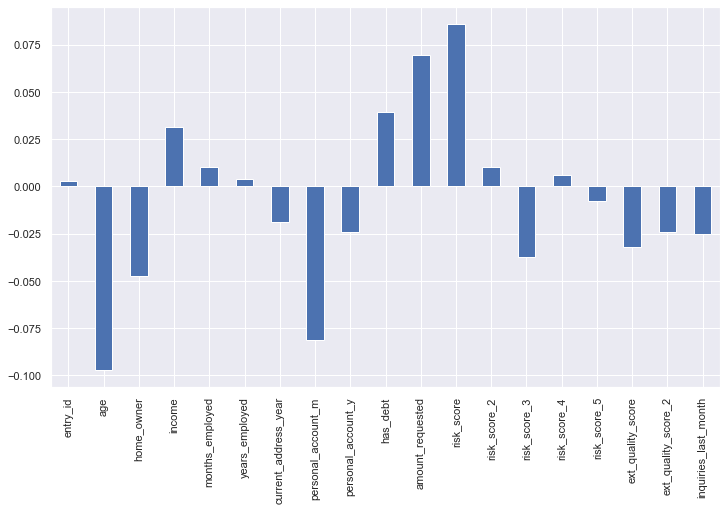

In [91]:
plt.figure(figsize=(12,7))
df.drop('e_signed',axis=1).corrwith(df['e_signed']).plot.bar()

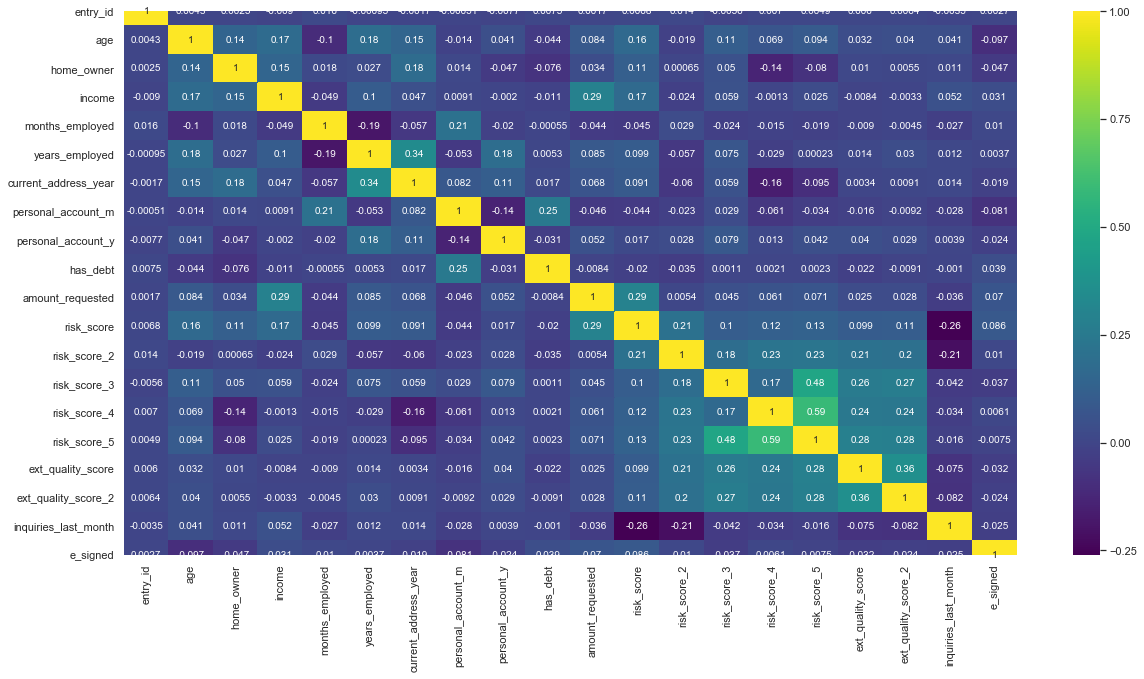

In [93]:
# Heat map of correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

# Feature Engineering

In [15]:
# Creating a check point
data_pre_processed = df.copy()
# Drop id column
data_pre_processed.drop(['entry_id'],axis=1,inplace=True)


In [79]:
# Joining personal account months and year columns to sum of months
data_pre_processed['personal_account_y'] = data_pre_processed['personal_account_y'].apply(lambda x: x *12)
data_pre_processed['personal_account_total_months'] = data_pre_processed.personal_account_m +data_pre_processed.personal_account_y

In [80]:
# Converting categorical variables  binary
data_pre_processed =pd.get_dummies(data_pre_processed,drop_first=True)

In [82]:
data_pre_processed.drop(['personal_account_y','personal_account_m'],axis=1,inplace=True)

In [108]:
data_pre_processed.drop('months_employed',axis=1,inplace=True)

In [111]:
data_pre_processed

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,personal_account_total_months
0,40,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,1,0,0,0,30
1,61,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,0,1,86
2,23,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,0,1,19
3,40,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,1,0,0,0,86
4,33,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,0,1,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,0,3245,5,3,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0,0,1,0,0,74
17904,46,0,6525,2,1,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0,1,0,0,0,39
17905,46,0,2685,5,1,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0,0,0,0,1,97
17906,42,0,2515,3,5,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1,1,0,0,0,18


# Splitting the data

In [157]:
from sklearn.model_selection import train_test_split
# Define feature and target variables
X = data_pre_processed.drop('e_signed',axis=1)
y = data_pre_processed['e_signed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [158]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler


In [159]:
X1_train = pd.DataFrame(scaler.fit_transform(X_train),columns=[X_train.columns])
X1_test = pd.DataFrame(scaler.transform(X_test),columns=[X_test.columns])
X_train = X1_train
X_test = X1_test


In [160]:
X_test

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,personal_account_total_months
0,0.166667,0.0,0.263216,0.0625,0.000000,1.0,0.086294,0.454685,0.735201,0.671892,0.596347,0.718643,0.686435,0.583468,0.275862,0.0,0.0,1.0,0.0,0.207650
1,0.166667,0.0,0.247797,0.1875,0.000000,0.0,0.045685,0.724526,0.682214,0.774560,0.584674,0.764055,0.526469,0.632356,0.034483,1.0,0.0,0.0,0.0,0.273224
2,0.358974,0.0,0.204295,0.6250,0.500000,1.0,0.076142,0.722990,0.587249,0.727284,0.453254,0.485337,0.566754,0.568361,0.137931,0.0,0.0,1.0,0.0,0.142077
3,0.371795,0.0,0.342511,0.1875,0.833333,1.0,0.253807,0.802867,0.659646,0.747981,0.538611,0.839794,0.550554,0.760483,0.172414,0.0,0.0,0.0,1.0,0.546448
4,0.243590,1.0,0.858590,0.1875,0.083333,1.0,0.258883,0.791091,0.663779,0.889196,0.619710,0.722211,0.787425,0.788214,0.103448,0.0,0.0,1.0,0.0,0.076503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,0.410256,1.0,0.314978,0.0625,0.250000,1.0,0.076142,0.686124,0.752279,0.952785,0.489377,0.563151,0.611826,0.717396,0.068966,0.0,0.0,1.0,0.0,0.098361
3578,0.102564,1.0,0.497026,0.6250,0.083333,1.0,0.081218,0.584741,0.678681,0.825751,0.587220,0.576481,0.460913,0.462912,0.172414,0.0,0.0,1.0,0.0,0.704918
3579,0.307692,0.0,0.235132,0.3750,0.583333,1.0,0.035635,0.544803,0.804950,0.778352,0.360160,0.498900,0.653916,0.551069,0.068966,1.0,0.0,0.0,0.0,0.295082
3580,0.282051,0.0,0.261013,0.3125,0.500000,1.0,0.086294,0.663082,0.642973,0.799172,0.541189,0.567010,0.422941,0.529212,0.103448,1.0,0.0,0.0,0.0,0.273224


# Model Building 

In [161]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

model = LogisticRegression(random_state=0,penalty='l1')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
pc = precision_score(y_test,predictions)
rec =recall_score(y_test,predictions)

results1=pd.DataFrame([['Logistic Regression' ,acc,f1,pc,rec]],columns=['Model','accuracy','f1_score','precision','recall_score'])
results1


C:\Users\Shangar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Model,accuracy,f1_score,precision,recall_score
0,Logistic Regression,0.561139,0.634248,0.575105,0.70695


In [162]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1654
           1       0.58      0.71      0.63      1928

    accuracy                           0.56      3582
   macro avg       0.55      0.55      0.54      3582
weighted avg       0.56      0.56      0.55      3582



In [163]:
# SVM Model
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

model2 =SVC(random_state=0,kernel='linear')
model2.fit(X_train,y_train)
predictions = model2.predict(X_test)
acc = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
pc = precision_score(y_test,predictions)
rec =recall_score(y_test,predictions)

results2=pd.DataFrame([['SVC Linear' ,acc,f1,pc,rec]],columns=['Model','accuracy','f1_score','precision','recall_score'])

results1= results1.append(results2,ignore_index=True)

In [164]:
results1

,Model,accuracy,f1_score,precision,recall_score
0,Logistic Regression,0.561139,0.634248,0.575105,0.706950
1,SVC Linear,0.567560,0.647394,0.576876,0.737552


In [165]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

model2 =SVC(random_state=0,kernel='rbf')
model2.fit(X_train,y_train)
predictions = model2.predict(X_test)
acc = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
pc = precision_score(y_test,predictions)
rec =recall_score(y_test,predictions)

results3=pd.DataFrame([['SVC RBF' ,acc,f1,pc,rec]],columns=['Model','accuracy','f1_score','precision','recall_score'])

results1= results1.append(results3,ignore_index=True)

C:\Users\Shangar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [166]:
results1

,Model,accuracy,f1_score,precision,recall_score
0,Logistic Regression,0.561139,0.634248,0.575105,0.706950
1,SVC Linear,0.567560,0.647394,0.576876,0.737552
2,SVC RBF,0.564489,0.656236,0.570498,0.772303


In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

model3 =RandomForestClassifier(random_state=0,n_estimators=100,criterion='entropy')
model3.fit(X_train,y_train)
predictions = model3.predict(X_test)
acc = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
pc = precision_score(y_test,predictions)
rec =recall_score(y_test,predictions)

results3=pd.DataFrame([['Random Forest(n=100)' ,acc,f1,pc,rec]],columns=['Model','accuracy','f1_score','precision','recall_score'])

results1= results1.append(results3,ignore_index=True)

In [168]:
results1

,Model,accuracy,f1_score,precision,recall_score
0,Logistic Regression,0.561139,0.634248,0.575105,0.706950
1,SVC Linear,0.567560,0.647394,0.576876,0.737552
2,SVC RBF,0.564489,0.656236,0.570498,0.772303
3,Random Forest(n=100),0.629816,0.663793,0.649306,0.678942


# Cross-Validation

In [169]:
from sklearn.model_selection import cross_val_score

In [171]:
accuracy = cross_val_score(estimator=model3,X=X_train,y=y_train,cv=10)
print(accuracy.mean())
print(accuracy.std()*2)

0.6281617675776452
0.02624864556314167


# Random forest tuning

In [177]:
# Round 1 entropy
params ={
        'max_depth':[3,None],
        'max_features':[1,5,10],
        'min_samples_split':[2,5,10],
        'min_samples_leaf' : [1,5,10],
        'bootstrap':[True,False],
        'criterion' : ['entropy']
        
}

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
grid_search=GridSearchCV(estimator=model3,param_grid=params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search =grid_search.fit(X_train,y_train)

In [181]:
rf_accuracy = grid_search.best_score_
rf_params= grid_search.best_params_

In [182]:
rf_accuracy

0.6349294988133464

In [183]:
rf_params

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score


predictions = grid_search.predict(X_test)
acc = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
pc = precision_score(y_test,predictions)
rec =recall_score(y_test,predictions)

results3=pd.DataFrame([['Random Forest(n=100,Grid Search Entropy' ,acc,f1,pc,rec]],columns=['Model','accuracy','f1_score','precision','recall_score'])

results1= results1.append(results3,ignore_index=True)
results1

,Model,accuracy,f1_score,precision,recall_score
0,Logistic Regression,0.561139,0.634248,0.575105,0.706950
1,SVC Linear,0.567560,0.647394,0.576876,0.737552
2,SVC RBF,0.564489,0.656236,0.570498,0.772303
3,Random Forest(n=100),0.629816,0.663793,0.649306,0.678942
4,"Random Forest(n=100,Grid Search Entropy",0.628978,0.660015,0.651186,0.669087


In [185]:
# Round 1 Gini
params ={
        'max_depth':[3,None],
        'max_features':[1,5,10],
        'min_samples_split':[2,5,10],
        'min_samples_leaf' : [1,5,10],
        'bootstrap':[True,False],
        'criterion' : ['gini']
        
}

grid_search=GridSearchCV(estimator=model3,param_grid=params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search =grid_search.fit(X_train,y_train)
rf_accuracy = grid_search.best_score_
rf_params= grid_search.best_params_
rf_accuracy,rf_params

(0.6384196565684769,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [186]:
predictions = grid_search.predict(X_test)
acc = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
pc = precision_score(y_test,predictions)
rec =recall_score(y_test,predictions)

results3=pd.DataFrame([['Random Forest(n=100,Grid Search Gini' ,acc,f1,pc,rec]],columns=['Model','accuracy','f1_score','precision','recall_score'])

results1= results1.append(results3,ignore_index=True)
results1

,Model,accuracy,f1_score,precision,recall_score
0,Logistic Regression,0.561139,0.634248,0.575105,0.706950
1,SVC Linear,0.567560,0.647394,0.576876,0.737552
2,SVC RBF,0.564489,0.656236,0.570498,0.772303
3,Random Forest(n=100),0.629816,0.663793,0.649306,0.678942
4,"Random Forest(n=100,Grid Search Entropy",0.628978,0.660015,0.651186,0.669087
5,"Random Forest(n=100,Grid Search Gini",0.632607,0.672474,0.646411,0.700726


In [193]:
final_result = pd.concat([df['entry_id'],y_test],axis=1).dropna()
final_result['predictions'] = predictions
final_result = final_result[['entry_id','e_signed','predictions']]

In [194]:
final_result

,entry_id,e_signed,predictions
8,6493191,1.0,1
9,8908605,1.0,0
12,6889184,1.0,0
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,0
17890,3605941,0.0,1
17901,1807355,0.0,0
